# Interesting title

### The task summary

### Comments on the dataset, task and analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

DATA = 'lalonde.csv'

# Question 1

## Task 1 - A naive analysis

In [2]:
# loading
df_lalonde = pd.read_csv(DATA)
print(df_lalonde.shape)

(614, 11)


In [3]:
df_lalonde.head(2)

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.046
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.894


In [4]:
# split the data on treatment and control

df_treat = df_lalonde.loc[df_lalonde['treat']==1]
df_control = df_lalonde.loc[df_lalonde['treat']==0]

In [5]:
df_lalonde.describe()

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.301303,27.363192,10.268730,0.395765,0.117264,0.415309,0.630293,4557.546569,2184.938207,6792.834483
std,0.459198,9.881187,2.628325,0.489413,0.321997,0.493177,0.483119,6477.964479,3295.679043,7470.730792
min,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,238.283425
50%,0.000000,25.000000,11.000000,0.000000,0.000000,0.000000,1.000000,1042.330000,601.548400,4759.018500
75%,1.000000,32.000000,12.000000,1.000000,0.000000,1.000000,1.000000,7888.498250,3248.987500,10893.592500
max,1.000000,55.000000,18.000000,1.000000,1.000000,1.000000,1.000000,35040.070000,25142.240000,60307.930000


In [6]:
df_treat.describe()

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
count,185.0,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,1.0,25.816216,10.345946,0.843243,0.059459,0.189189,0.708108,2095.573689,1532.055314,6349.143530
std,0.0,7.155019,2.010650,0.364558,0.237124,0.392722,0.455867,4886.620353,3219.250870,7867.402218
min,1.0,17.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,20.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,485.229800
50%,1.0,25.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4232.309000
75%,1.0,29.000000,12.000000,1.000000,0.000000,0.000000,1.000000,1291.468000,1817.284000,9642.999000
max,1.0,48.000000,16.000000,1.000000,1.000000,1.000000,1.000000,35040.070000,25142.240000,60307.930000


In [7]:
df_control.describe()

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
count,429.0,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000
mean,0.0,28.030303,10.235431,0.202797,0.142191,0.512821,0.596737,5619.236506,2466.484443,6984.169742
std,0.0,10.786653,2.855238,0.402552,0.349654,0.500419,0.491126,6788.750796,3291.996183,7294.161791
min,0.0,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,19.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,220.181300
50%,0.0,25.000000,11.000000,0.000000,0.000000,1.000000,1.000000,2547.047000,1086.726000,4975.505000
75%,0.0,35.000000,12.000000,0.000000,0.000000,1.000000,1.000000,9277.128000,3881.419000,11688.820000
max,0.0,55.000000,18.000000,1.000000,1.000000,1.000000,1.000000,25862.320000,18347.230000,25564.670000


Participated in program - 185, control data - 429

For the earnings - if the value is 0 it means person is unemployed.

### Comparison of the outcome variable re78

(http://seaborn.pydata.org/tutorial/categorical.html)

In [8]:
# getting pandas to do the basic stats
treat_78 = df_treat['re78'].describe().to_dict()
control_78 = df_control['re78'].describe().to_dict()
print(control_78)

{'count': 429.0, 'mean': 6984.1697423076921, 'std': 7294.1617908684048, 'min': 0.0, '25%': 220.18129999999999, '50%': 4975.5050000000001, '75%': 11688.82, 'max': 25564.669999999998}


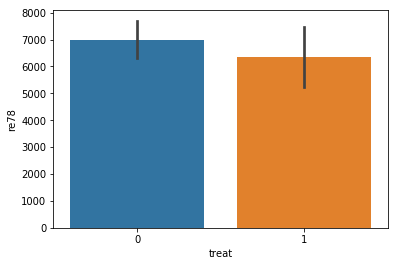

In [9]:
# plot the raw data, set title and axis names

plot_78_bar = sns.barplot(data=df_lalonde, x='treat', y='re78')

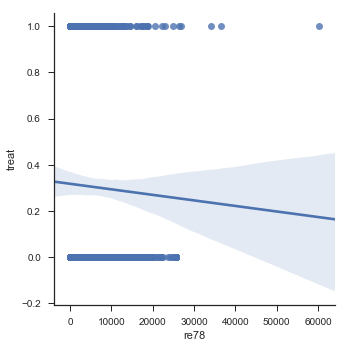

In [23]:
# even worse, perform logistic regression on raw data
plot_78_reg = sns.lmplot(data=df_lalonde, y='treat', x='re78')

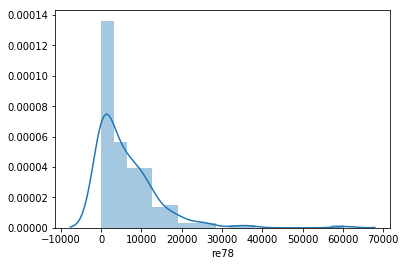

In [11]:
plot_78_joint = sns.distplot(df_treat['re78'])

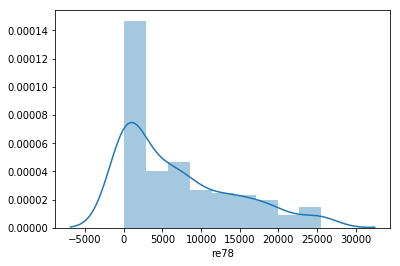

In [12]:
plot_78_joint = sns.distplot(df_control['re78'])

In [13]:
df_lalonde_78 = df_lalonde.filter(['treat','re78'], axis=1)

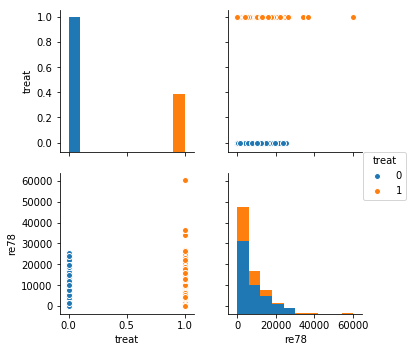

In [14]:

sns.pairplot(data=df_lalonde_78, hue='treat')

In [15]:
df_treat_78 = df_lalonde_78.loc[df_lalonde_78['treat']==1]
df_control_78 = df_lalonde_78.loc[df_lalonde_78['treat']==0]

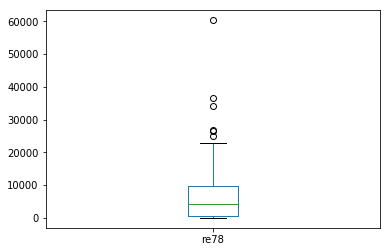

In [16]:
df_treat_78['re78'].plot(kind='box')

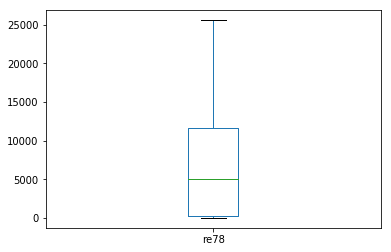

In [17]:
df_control_78['re78'].plot(kind='box')

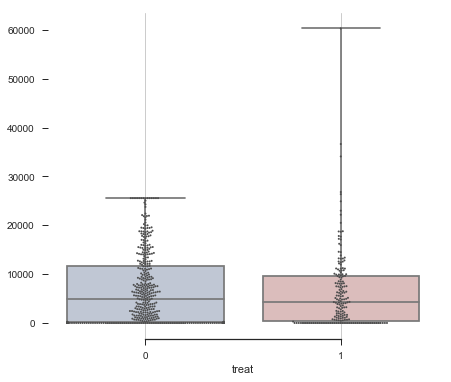

In [21]:
sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# boxplot
sns.boxplot(x='treat', y='re78', data=df_lalonde_78,
            whis=np.inf, palette="vlag")

# swarmplot
sns.swarmplot(x='treat', y='re78', data=df_lalonde_78,
              size=2, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

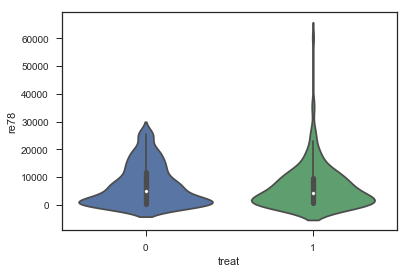

In [32]:
sns.violinplot(data=df_lalonde_78, x='treat', y='re78')

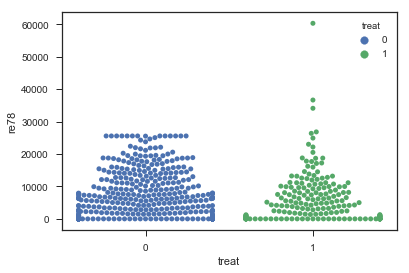

In [28]:
sns.swarmplot(data=df_lalonde_78, x='treat', y='re78', hue='treat')

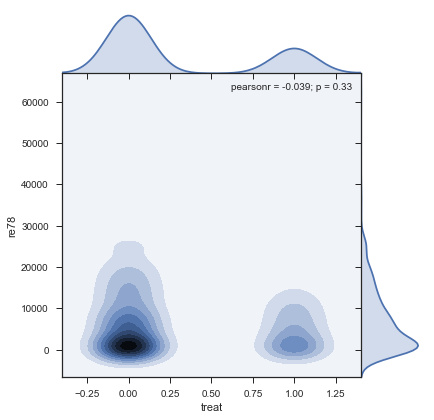

In [39]:
sns.jointplot(df_lalonde_78['treat'], df_lalonde_78['re78'], kind='kde', space=0)

## Task 2